In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

In [3]:
df = pd.read_csv("Student_Performance.csv")

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
X = df[['Hours Studied', 'Sleep Hours']]  
y = df['Performance Index']            


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

print(X)

      Hours Studied  Sleep Hours
0                 7            9
1                 4            4
2                 8            7
3                 5            5
4                 7            8
...             ...          ...
9995              1            4
9996              7            8
9997              6            8
9998              9            7
9999              7            8

[10000 rows x 2 columns]


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Grafici di Test

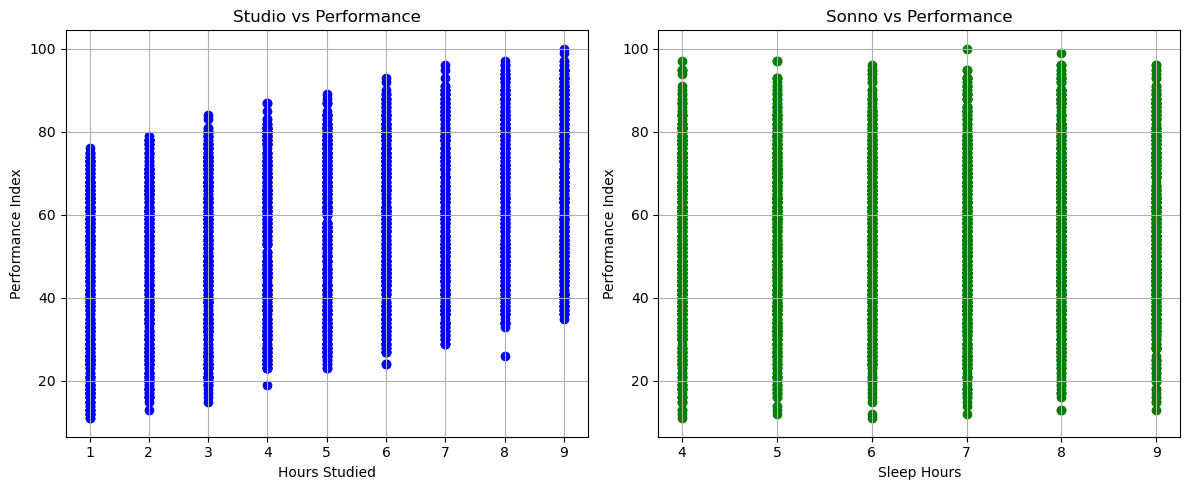

In [6]:
plt.figure(figsize=(12, 5))

# Studio vs Performance
plt.subplot(1, 2, 1)
plt.scatter(X_test['Hours Studied'], y_test, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Studio vs Performance')
plt.grid(True)

# Sonno vs Performance
plt.subplot(1, 2, 2)
plt.scatter(X_test['Sleep Hours'], y_test, color='green')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sonno vs Performance')
plt.grid(True)

plt.tight_layout()
plt.show()

# Grafici di Train

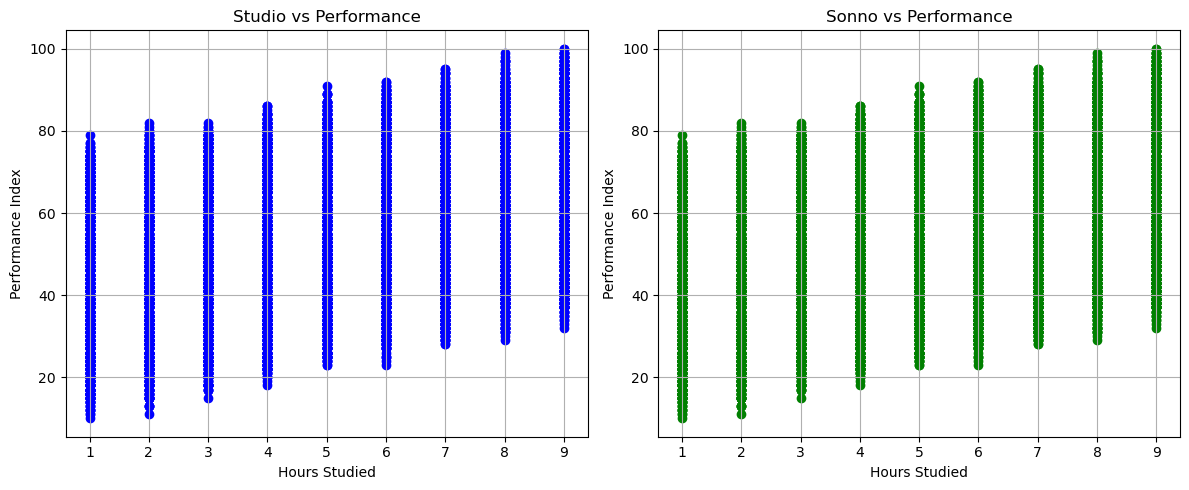

In [7]:
plt.figure(figsize=(12, 5))

# Studio vs Performance
plt.subplot(1, 2, 1)
plt.scatter(X_train['Hours Studied'], y_train, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Studio vs Performance')
plt.grid(True)

# Sonno vs Performance
plt.subplot(1, 2, 2)
plt.scatter(X_train['Hours Studied'], y_train, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Sonno vs Performance')
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
y_pred = model.predict(X_test)

In [9]:
print("Mean squad error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficiente di detrioramento", r2_score(y_test, y_pred))
print("Coefficiente di detrioramento %.2f" % r2_score(y_test, y_pred))

Mean squad error: 322.80
Coefficiente di detrioramento 0.13830720035434008
Coefficiente di detrioramento 0.14


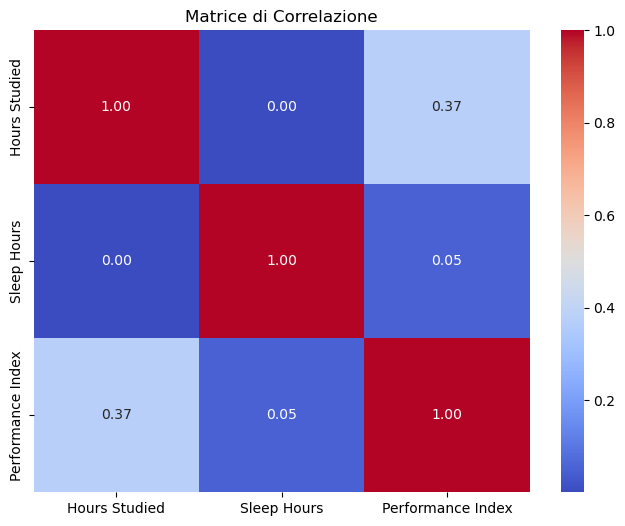

In [10]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['Hours Studied', 'Sleep Hours', 'Performance Index']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()


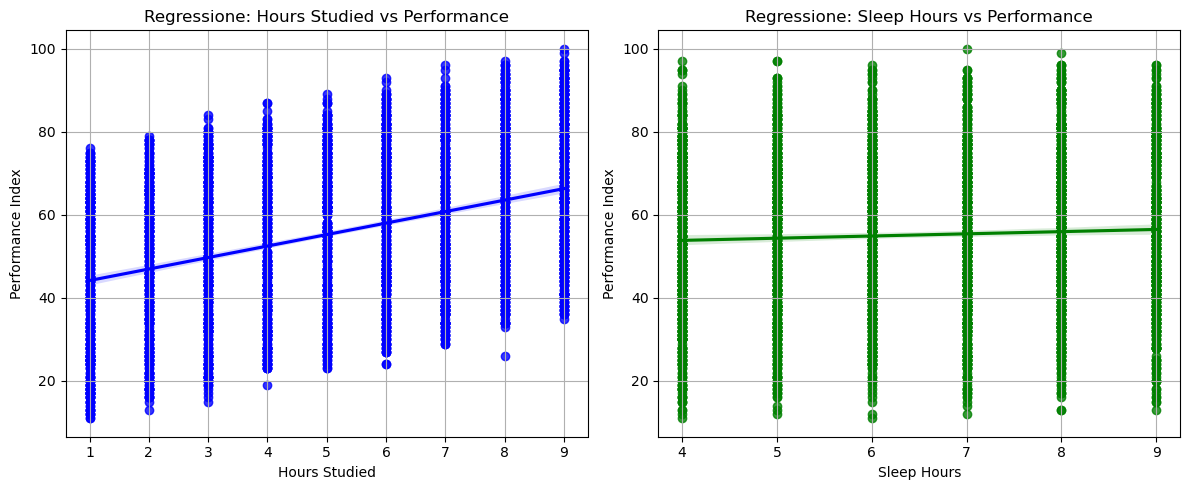

In [11]:
plt.figure(figsize=(12, 5))

# Ore di studio
plt.subplot(1, 2, 1)
sns.regplot(x=X_test['Hours Studied'], y=y_test, color='blue')
plt.title('Regressione: Hours Studied vs Performance')
plt.grid(True)

# Ore di sonno
plt.subplot(1, 2, 2)
sns.regplot(x=X_test['Sleep Hours'], y=y_test, color='green')
plt.title('Regressione: Sleep Hours vs Performance')
plt.grid(True)

plt.tight_layout()
plt.show()


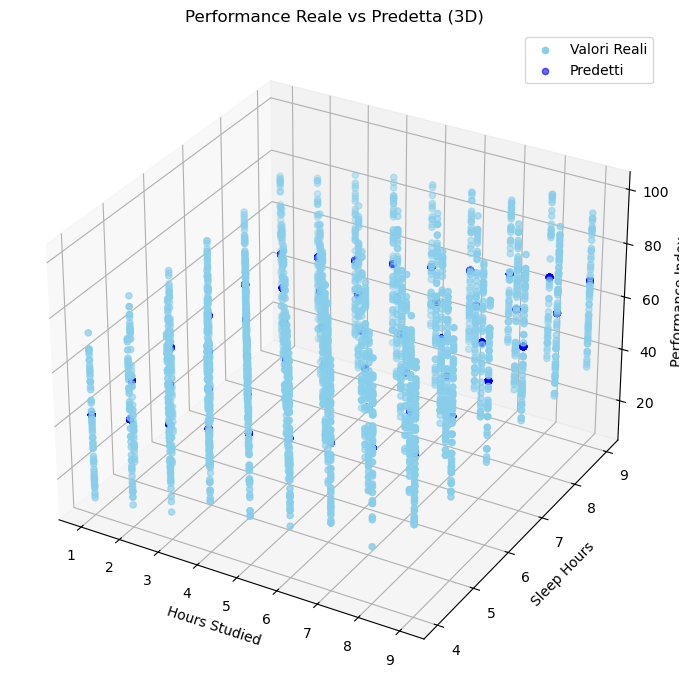

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Hours Studied'], X_test['Sleep Hours'], y_test, color='skyblue', label='Valori Reali')
ax.scatter(X_test['Hours Studied'], X_test['Sleep Hours'], y_pred, color='blue', alpha=0.6, label='Predetti')

ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Performance Index')
ax.set_title('Performance Reale vs Predetta (3D)')
ax.legend()
plt.tight_layout()
plt.show()
